# 10. 합성곱 신경망 사용하기

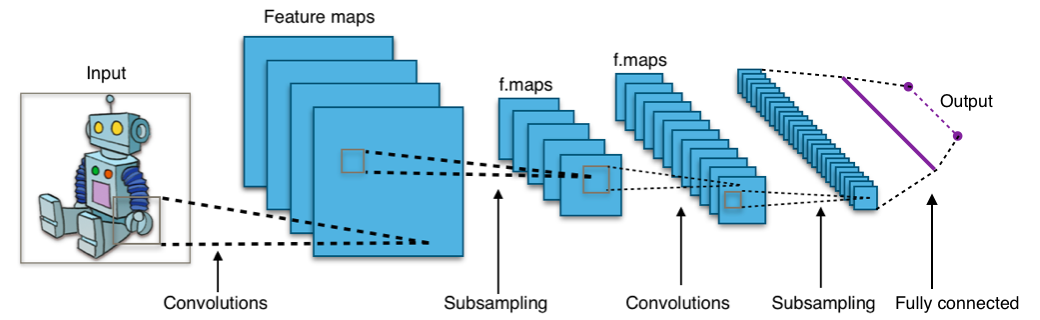

합성곱 신경망(Convolutional neural network, CNN)은 시각적 이미지 분석 및 분류에 가장 일반적으로 사용되는 인공신경망입니다.

## 1. MNIST데이터셋 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

앞의 예제에서와 같이 load_data()를 이용해서 keras.datasets에서 mnist 데이터셋을 불러옵니다.

## 2. 데이터 전처리하기

In [3]:
# 2. 데이터 전처리하기
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images/255.0, test_images/255.0

여기서 60000, 28, 28, 1 은 각각 무엇을 의미하는지?
- https://stackoverflow.com/questions/58081284/what-does-reshape60000-28-28-1-mean#comment102557211_58081284

생각해 보세요. RGB라면 28 x 28 픽셀의 60k 이미지를 어떻게 저장할까요?

각 픽셀에 대해 3개의 스칼라(각각 하나의 채널에 대해)가 필요하므로 60000x28x28 x3 입니다.

이미지가 회색조일 때 몇 개의 채널이 필요합니까? 하나뿐이므로 60000x28x28 x1 이 됩니다.

물론 하나의 채널의 경우 60000x28x28로 훨씬 더 단순화될 수 있지만 이미지가 얼마나 많은 채널에 대한 정보를 명시적으로 제공하고 일부 ML 프레임워크가 해당 정보가 올바르게 작동하도록 요구하는 것처럼 보이기 때문에 전자의 접근 방식이 더 낫다고 말하고 싶습니다. .

mnist 데이터셋의 자료형을 출력해보면 numpy.ndarray 클래스임을 알 수 있습니다.

NumPy의 reshape()함수를 이용해서 적절한 형태로 변환하고,

0~255사이의 값을 갖는 데이터를 0.0 ~ 1.0사이의 값을 갖도록, 255.0으로 나눠줍니다.

## 3. 합성곱 신경망 구성하기

In [4]:
# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.summary()

tf.keras.models 모듈의 Sequential 클래스를 사용해서 인공신경망의 각 층을 순서대로 쌓을 수 있습니다.

add()메서드를 이용해서 합성곱 층 Conv2D와 MaxPooling층 MaxPooling2D를 반복해서 구성합니다.

첫번째 Conv2D층의 첫번째 인자 32는 filters 값입니다.

합성곱 연산에서 사용되는 필터(filter)는 이미지에서 특징(feature)을 분리해내는 기능을 합니다.

filters의 값은 합성곱에 사용되는 필터의 종류(개수)이며, 출력 공간의 차원(깊이)을 결정합니다.

두번째 인자 (3,3)은 kernel_size 값입니다.

kernel_size는 합성곱에 사용되는 필터(=커널)의 크기입니다.

아래와 같은 3*3크기의 필터가 사용되며, 합성곱 연산이 이루어지고 나면 이미지는 (28*28) 크기에서 (26*26)이 됩니다.

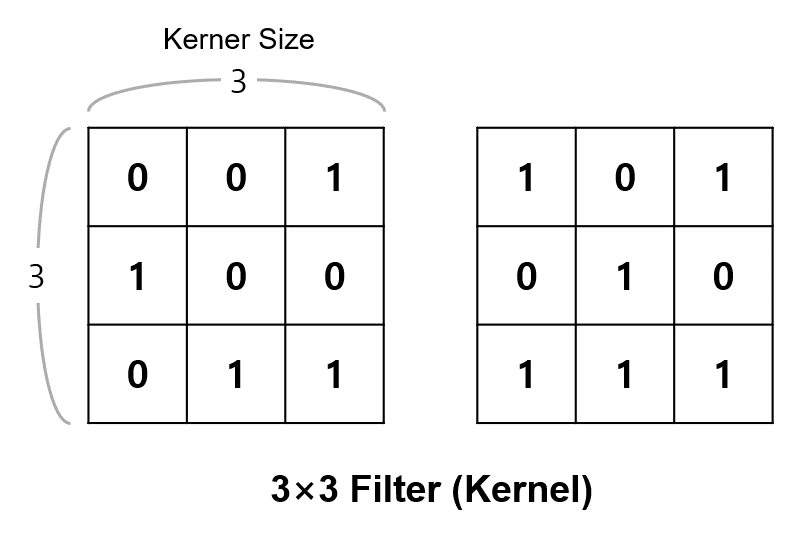

활성화함수(Activation function)는 relu로 지정하고,

입력 데이터의 형태 (input_shape)는 아래와 같이 MNIST숫자 이미지 하나의 형태에 해당하는 (28,28,1)로 설정합니다.

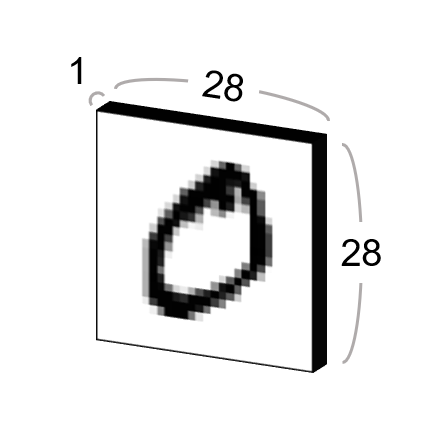

풀링(Pooling)은 합성곱에 의해 얻어진 Feature map으로부터 값을 샘플링해서 정보를 압축하는 과정을 의미합니다.

맥스풀링(Max-pooling)은 특정 영역에서 가장 큰 값을 샘플링하는 불링 방식이며,

예제에서는 풀링 필터의 크기를 2*2 영역으로 설정했습니다.

strides는 풀링 필터를 이동시키는 간격을 의미합니다.

strides를 지정해주지 않으면 (None), 풀링 필터의 크기와 같아서 영역의 오버랩 없이 풀링이 이루어집니다.

따라서 풀링이 이루어지고나면, (26,26) 크기의 이미지는 (13,13)크기가 됩니다.

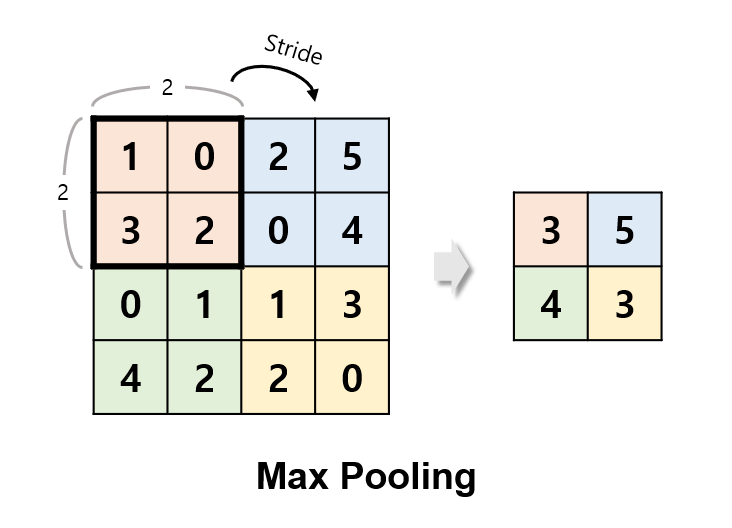

summary()메서드를 이용해서 지금까지 구성한 신경망에 대한 정보를 출력할 수 있습니다.

In [5]:
model.summary()

지금까지 구성한 신경망 구조를 그림으로 나타내면 아래와 같습니다.

이러한 합성곱, 풀링 층은 **특성 추출(Feature Extraction)**을 담당하며, 전체 합성곱 신경망의 앞부분을 구성합니다.

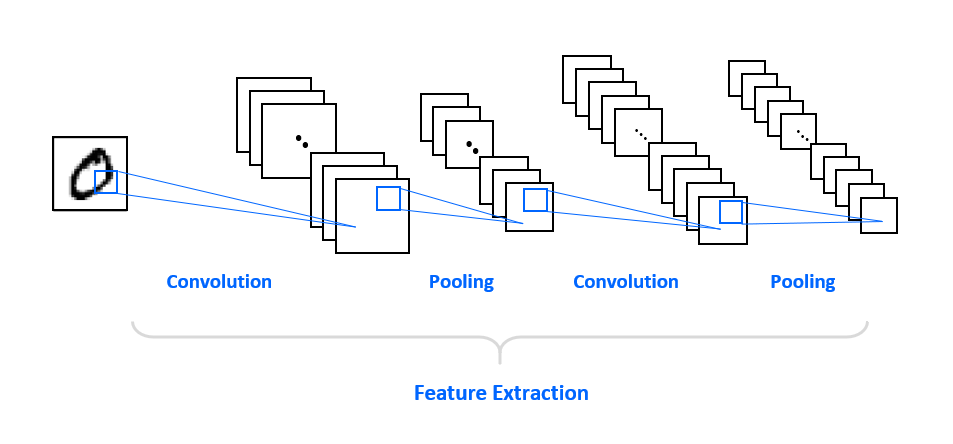

# 4. Dense층 추가하기

In [6]:
# 4. Dense 층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

합성곱 층에 이어 뒷부분에는 분류를 담당하는 Dense 층 (Fully-connected layer)을 세 개 추가합니다.

마지막 출력층 노드의 개수는 열 개로 하고 ‘softmax’ 활성화함수를 사용합니다.

flatten, dense, dense_1 이라는 세 개의 층이 추가되고,

훈련 가능한 파라미터의 수가 55,744개에서 60,554개로 증가했습니다.

지금까지 구성한 전체 신경망의 구조를 그림으로 나타내면 아래와 같습니다.

여러 층의 합성곱, 풀링층과 Dense 층이 반복적으로 구성되었습니다.

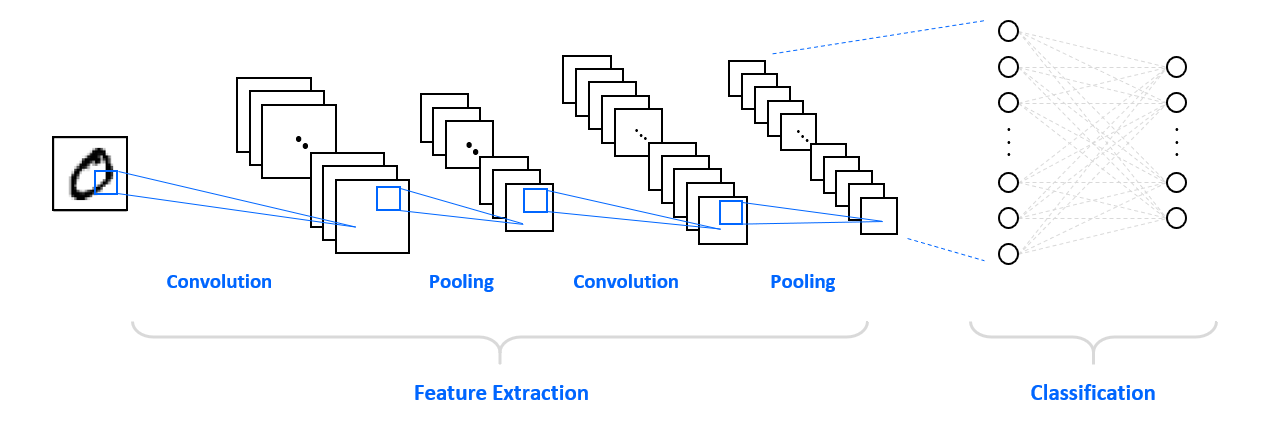

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

## 5. 모델 컴파일하기

In [8]:
# 5. 모델 컴파일하기
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

앞의 예제와 마찬가지로 compile() 메서드를 이용해서 옵티마이저, 손실 함수, 지표를 각각 설정해줍니다.

## 6. 훈련하기

In [10]:
# 6. 훈련하기
model.fit(train_images, train_labels, epochs=5)

fit() 메서드에 미리 준비한 train_images와 train_labels, 5회의 epochs를 입력하고 훈련을 진행합니다.

## 7. 모델 평가하기

In [11]:
# 7. 모델 평가하기
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

evaluate() 메서드에 test_images와 test_labels를 입력함으로써 모델을 평가할 수 있습니다.

손실 함수 값이 0.0248, 그리고 정확도가 0.9923입니다.

합성곱 신경망을 사용해서 이미지 분류를 수행할 때, 단순한 Dense 층으로만 이루어진 신경망으로 학습한 경우의 정확도인 0.9802에 비해

더 높은 정확도를 얻을 수 있음을 알 수 있습니다.

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# 1. MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 2. 데이터 전처리하기
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))
train_images, test_images = train_images/255.0, test_images/255.0

# 3. 합성곱 신경망 구성하기
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))

model.summary()

# 4. Dense층 추가하기
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

model.summary()

# 5. 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 6. 훈련하기
model.fit(train_images, train_labels, epochs=5)

# 7. 모델 평가하기
loss, acc = model.evaluate(test_images, test_labels, verbose=2)